# Capstone Project - The Battle of Neighborhoods
## Exploring Potential Locations of New Franchises for Torchy’s Tacos Food Chain


## Introduction
### Background
Austin is the capital city of the U.S. state of Texas. It is the 11th-most populous city in the United States, the fourth-most-populous city in Texas, and the second-most-populous state capital city)[1].  Torchy’s Tacos is a famous restaurant in Texas with more than 60 physical locations. It was founded in Austin in 2006 by former corporate chef Michael Rypka, who was inspired by a love for tacos and a passion for experimenting with food to bring an untraditional taco experience to the people of Texas. Today, Torchy’s serves innovative, unconventional tacos to customers in over 50 locations across three states, offering a unique and edgy dining experience.[2]
 
### Problem
This project focus on a hypothetical business plan. Assuming someone wants to open another franchise of Torchy’s Tacos in Austin. Given the huge amount of investment involved, it become vital to determine the best location to get the highest rate of return in the investment. Since, there are already 14 locations of this chain in Austin Texas, there would be sufficient data to explore the new location of the franchise. 

### Interested Audience
There are two groups of people who would be interested in this project and its outcome. First, any potential investors who plan to open a new franchise in the Austin and want to adopt a data driven approach while making the decision. Second, the findings of this work could be used by existing owners of the chains to investigate why certain restaurants are performing better than other. Is it purely driven by the nearby popular venues or is it because of good food and service at certain locations? The project will try to explore these areas.


### Data
The following sources were used to obtain the data for this project. 

•	**FourSquare API**: It offers real-time access to Foursquare’s global database of rich venue data and user content . It was used to obtain information about nearby venues based on the geo (latitude and longitude) data.

•	**Store Locations**: The store locations and addresses were accessed using the webpage of the food chain [3]. The web-scaping via python was not possible due to security features in the website. Since, there are only 14 locations, the addressed were saved in the excel sheet manually.

•	**Google Maps**: The latitude and longitude data were obtained via google maps.

•	**Yelp Rating**: The yelp rating of the food chain at different locations along with the numbers of reviews posted online was used to rate the performance of the different locations.


In [396]:
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import urllib.request # import the library we use to open URLs
import requests

In [397]:
import warnings 
warnings.filterwarnings('ignore')

In [398]:
!pip install lxml
import lxml

In [399]:
!pip install geopy

### Read Location data of the different Torchy Tacos in Austin

In [401]:
df_Torchy = pd.read_csv('TorchyTacosLocation.csv')
df_Torchy

,Neighborhood,Address,Latitude,Longitude
0,Escarpment,"5900 W Slaughter Ln, Austin, TX 78749",30.201690,-97.878780
1,Stone Hill,"18817 LIMESTONE COMMERCIAL DRIVE, Pflugerville...",30.468910,-97.595570
2,Northshore,"110 San Antonio Street, Austin, Texas, 78701",30.265000,-97.749280
3,Lakeway,"1945 Medical Dr, Lakeway, TX 78734",30.346830,-97.968070
4,Cedar Park,"1468 E Whitestone Blvd, Cedar Park, TX 78613",30.526660,-97.808810
5,Spicewood Springs,"4211 Spicewood Springs Rd, Austin, TX 78759",30.370703,-97.756276
6,Guadalupe,"2801 Guadalupe St, Austin, TX 78705",30.293745,-97.741711
7,Burnet,"5119 Burnet Rd, Austin, TX 78756",30.323461,-97.739258
8,Belterra,"166 Hargraves Dr, Austin, TX 78737",30.204425,-97.978874
9,Arbor Trails,"4301 W William Cannon Dr, Austin, TX 78749",30.221531,-97.841139


In [198]:
df_Torchy.shape

(14, 4)

### Methodology

#### Exploratory Data Analysis (EDA): EDA was performed to visualize the existing locations of the food chain- Torchy’s Tacos in the Austin, TX region.
##### Let's explore and cluster the neighborhoods in near Torchy's Locations in Austin.

In [402]:
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


#### Use geopy library to get the latitude and longitude values of Austin, TX

In [403]:
address = 'Austin, TX'

geolocator = Nominatim(user_agent="Austin")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Austin are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Austin are 30.2711286, -97.7436995.


#### Create a map of Austin with neighborhoods superimposed on top.

In [408]:
# create map of Austin using latitude and longitude values
map_Austin = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, Name in zip(df_Torchy['Latitude'], df_Torchy['Longitude'], df_Torchy['Neighborhood']):
    label = '{}'.format(Name)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Austin)  
    
map_Austin

#### Define Foursquare Credentials and Version

In [409]:
CLIENT_ID = 'KWWUCXI2Q0LAKKFOFEFEQGFBB2ZRTVUXAIK35OY13VDVBURT' # your Foursquare ID
CLIENT_SECRET = 'VF11TWE5KA2WQY4OXU3KBMQHQEEOD35RLK1SSSK5D0PMTVQS' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: KWWUCXI2Q0LAKKFOFEFEQGFBB2ZRTVUXAIK35OY13VDVBURT
CLIENT_SECRET:VF11TWE5KA2WQY4OXU3KBMQHQEEOD35RLK1SSSK5D0PMTVQS


#### Let's explore the first neighborhood in our dataframe.

In [410]:
LIMIT =50
radius = 500

In [169]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [170]:
torchy_venues = getNearbyVenues(names=df_Torchy['Name'],
                                   latitudes=df_Torchy['Latitude'],
                                   longitudes=df_Torchy['Longitude']
                                  )
torchy_venues.head()

Escarpment
Stone Hill
Northshore
Lakeway
Cedar Park
Spicewood Springs
Guadalupe
Burnet
Belterra
Arbor Trails
Anderson Mill
Congress
South Lamar
Mueller


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Escarpment,30.20169,-97.87878,Torchy's Tacos,30.201523,-97.880080,Taco Place
1,Escarpment,30.20169,-97.87878,Starbucks,30.202654,-97.878785,Coffee Shop
2,Escarpment,30.20169,-97.87878,H-E-B,30.202255,-97.876456,Grocery Store
3,Escarpment,30.20169,-97.87878,District Kitchen + Cocktails,30.201487,-97.879732,American Restaurant
4,Escarpment,30.20169,-97.87878,Satellite...Eat. Drink. Orbit.,30.201790,-97.878818,New American Restaurant


#### Size of the resulting dataframe

In [171]:
print(torchy_venues.shape)
torchy_venues.head()

(504, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Escarpment,30.20169,-97.87878,Torchy's Tacos,30.201523,-97.880080,Taco Place
1,Escarpment,30.20169,-97.87878,Starbucks,30.202654,-97.878785,Coffee Shop
2,Escarpment,30.20169,-97.87878,H-E-B,30.202255,-97.876456,Grocery Store
3,Escarpment,30.20169,-97.87878,District Kitchen + Cocktails,30.201487,-97.879732,American Restaurant
4,Escarpment,30.20169,-97.87878,Satellite...Eat. Drink. Orbit.,30.201790,-97.878818,New American Restaurant


#### Let's check how many venues were returned for each neighborhood

In [172]:
torchy_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Anderson Mill,39,39,39,39,39,39
Arbor Trails,50,50,50,50,50,50
Belterra,15,15,15,15,15,15
Burnet,48,48,48,48,48,48
Cedar Park,24,24,24,24,24,24
Congress,46,46,46,46,46,46
Escarpment,18,18,18,18,18,18
Guadalupe,50,50,50,50,50,50
Lakeway,23,23,23,23,23,23


In [173]:
print('There are {} uniques categories.'.format(len(torchy_venues['Venue Category'].unique())))

There are 155 uniques categories.


## Analyze Each Neighborhood

In [174]:
# one hot encoding
torchy_onehot = pd.get_dummies(torchy_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
torchy_onehot['Neighborhood'] = torchy_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [torchy_onehot.columns[-1]] + list(torchy_onehot.columns[:-1])
torchy_onehot = torchy_onehot[fixed_columns]

torchy_onehot.head()

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Escarpment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Escarpment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Escarpment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Escarpment,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Escarpment,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [175]:
torchy_onehot.shape #shape of dataframe

(504, 156)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [176]:
torchy_grouped = torchy_onehot.groupby('Neighborhood').mean().reset_index()
torchy_grouped

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Anderson Mill,0.00,0.000000,0.000000,0.000000,0.000000,0.025641,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.025641,0.00,0.00,0.00,0.00,0.00,0.000000
1,Arbor Trails,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.020000,...,0.000000,0.000000,0.00000,0.000000,0.00,0.02,0.00,0.00,0.00,0.020000
2,Belterra,0.00,0.066667,0.000000,0.000000,0.000000,0.000000,0.00000,0.066667,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
3,Burnet,0.00,0.000000,0.020833,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.020833,0.020833,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.041667
4,Cedar Park,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.041667,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
5,Congress,0.00,0.000000,0.000000,0.065217,0.021739,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
6,Escarpment,0.00,0.111111,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.055556,0.00,0.00,0.00,0.00,0.00,0.000000
7,Guadalupe,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.020000,0.00,0.00,0.00,0.00,0.02,0.020000
8,Lakeway,0.00,0.173913,0.000000,0.000000,0.000000,0.000000,0.00000,0.043478,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
9,Mueller,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.040000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000


In [177]:
torchy_grouped.shape #shape

(14, 156)

#### Let's print each neighborhood along with the top 5 most common venues

In [178]:
num_top_venues = 5

for hood in torchy_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = torchy_grouped[torchy_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anderson Mill----
                  venue  freq
0  Fast Food Restaurant  0.05
1           Pizza Place  0.05
2    Salon / Barbershop  0.05
3     Convenience Store  0.05
4     Korean Restaurant  0.03


----Arbor Trails----
                  venue  freq
0           Pizza Place  0.08
1          Burger Joint  0.06
2                  Bank  0.06
3  Gym / Fitness Center  0.06
4        Sandwich Place  0.06


----Belterra----
                  venue  freq
0             Juice Bar  0.07
1  Gym / Fitness Center  0.07
2            Restaurant  0.07
3            Donut Shop  0.07
4        Sandwich Place  0.07


----Burnet----
                    venue  freq
0              Food Truck  0.10
1  Thrift / Vintage Store  0.08
2                  Bakery  0.06
3             Yoga Studio  0.04
4              Taco Place  0.04


----Cedar Park----
                 venue  freq
0   Mexican Restaurant  0.08
1       Sandwich Place  0.08
2         Burger Joint  0.08
3  Fried Chicken Joint  0.08
4        Big Box Stor

#### Let's put that into a *pandas* dataframe

In [179]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [190]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = torchy_grouped['Neighborhood']

for ind in np.arange(torchy_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(torchy_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anderson Mill,Fast Food Restaurant,Salon / Barbershop,Convenience Store,Pizza Place,Cosmetics Shop,Pet Store,Chinese Restaurant,Sandwich Place,Restaurant,Coffee Shop
1,Arbor Trails,Pizza Place,Gym / Fitness Center,Bank,Sandwich Place,Burger Joint,Dessert Shop,Mexican Restaurant,Smoothie Shop,Salon / Barbershop,Coffee Shop
2,Belterra,Donut Shop,BBQ Joint,Sandwich Place,Thai Restaurant,Fast Food Restaurant,Juice Bar,Restaurant,Taco Place,Liquor Store,Pizza Place
3,Burnet,Food Truck,Thrift / Vintage Store,Bakery,Coffee Shop,Taco Place,Mexican Restaurant,Gas Station,Yoga Studio,Pizza Place,Sandwich Place
4,Cedar Park,Fried Chicken Joint,Mexican Restaurant,Burger Joint,Sandwich Place,Fabric Shop,Café,South Indian Restaurant,Steakhouse,Gas Station,Bookstore
5,Congress,Art Gallery,Spa,Boutique,New American Restaurant,Italian Restaurant,Pizza Place,Food Truck,Sandwich Place,Burger Joint,Soup Place
6,Escarpment,American Restaurant,Pizza Place,Liquor Store,Salon / Barbershop,New American Restaurant,Coffee Shop,Bank,Food Truck,Grocery Store,Intersection
7,Guadalupe,Food Truck,Burger Joint,Taco Place,Bar,Thrift / Vintage Store,Shipping Store,Pizza Place,Thai Restaurant,Smoke Shop,Mexican Restaurant
8,Lakeway,American Restaurant,Fried Chicken Joint,Burger Joint,Gym,Bowling Alley,Thrift / Vintage Store,Fast Food Restaurant,Frozen Yogurt Shop,Pizza Place,Coffee Shop
9,Mueller,Park,Coffee Shop,Juice Bar,Liquor Store,Market,Shipping Store,Mobile Phone Shop,Salon / Barbershop,Restaurant,Food Truck


In [191]:
torchy_grouped

,Neighborhood,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Anderson Mill,0.00,0.000000,0.000000,0.000000,0.000000,0.025641,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.025641,0.00,0.00,0.00,0.00,0.00,0.000000
1,Arbor Trails,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.020000,...,0.000000,0.000000,0.00000,0.000000,0.00,0.02,0.00,0.00,0.00,0.020000
2,Belterra,0.00,0.066667,0.000000,0.000000,0.000000,0.000000,0.00000,0.066667,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
3,Burnet,0.00,0.000000,0.020833,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.020833,0.020833,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.041667
4,Cedar Park,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.041667,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
5,Congress,0.00,0.000000,0.000000,0.065217,0.021739,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
6,Escarpment,0.00,0.111111,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.055556,0.00,0.00,0.00,0.00,0.00,0.000000
7,Guadalupe,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.020000,0.00,0.00,0.00,0.00,0.02,0.020000
8,Lakeway,0.00,0.173913,0.000000,0.000000,0.000000,0.000000,0.00000,0.043478,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
9,Mueller,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.040000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000


### **K-Mean Clustering**:
This is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. Python in-built function was used to create clusters encompassing the different location based on the similarity of the different venues around them.

#### Cluster Neighborhoods

#### The K-mean clustering was adopted to create five clusters based on the venue data generated from the four-square API. The result is shown below.
#### Run *k*-means to cluster the neighborhood into 5 clusters.

In [196]:
# set number of clusters
kclusters = 5

torchy_grouped_clustering = torchy_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(torchy_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:14] 
torchy_grouped_clustering

,Accessories Store,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Auto Workshop,Automotive Shop,BBQ Joint,Bagel Shop,Bakery,...,Used Bookstore,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,0.00,0.000000,0.000000,0.000000,0.000000,0.025641,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.025641,0.00,0.00,0.00,0.00,0.00,0.000000
1,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.020000,0.020000,...,0.000000,0.000000,0.00000,0.000000,0.00,0.02,0.00,0.00,0.00,0.020000
2,0.00,0.066667,0.000000,0.000000,0.000000,0.000000,0.00000,0.066667,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
3,0.00,0.000000,0.020833,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.062500,...,0.020833,0.020833,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.041667
4,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.041667,0.041667,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
5,0.00,0.000000,0.000000,0.065217,0.021739,0.000000,0.00000,0.000000,0.000000,0.021739,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
6,0.00,0.111111,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.055556,0.00,0.00,0.00,0.00,0.00,0.000000
7,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.020000,0.00,0.00,0.00,0.00,0.02,0.020000
8,0.00,0.173913,0.000000,0.000000,0.000000,0.000000,0.00000,0.043478,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000
9,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.040000,0.00000,0.000000,0.00,0.00,0.00,0.00,0.00,0.000000


In [199]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'ClusterLabels', kmeans.labels_)

torchy_merged = df_Torchy

# merge torchy_grouped with torchy to add latitude/longitude for each neighborhood
torchy_merged = torchy_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

torchy_merged.head() # check the last columns!

,Neighborhood,Address,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Escarpment,"5900 W Slaughter Ln, Austin, TX 78749",30.20169,-97.87878,0,American Restaurant,Pizza Place,Liquor Store,Salon / Barbershop,New American Restaurant,Coffee Shop,Bank,Food Truck,Grocery Store,Intersection
1,Stone Hill,"18817 LIMESTONE COMMERCIAL DRIVE, Pflugerville...",30.46891,-97.59557,0,Bakery,Pizza Place,Gift Shop,Ice Cream Shop,Furniture / Home Store,Chinese Restaurant,Clothing Store,Discount Store,Accessories Store,Movie Theater
2,Northshore,"110 San Antonio Street, Austin, Texas, 78701",30.26500,-97.74928,4,Coffee Shop,Italian Restaurant,Gym,Grocery Store,Cocktail Bar,Concert Hall,Steakhouse,Mexican Restaurant,New American Restaurant,Salad Place
3,Lakeway,"1945 Medical Dr, Lakeway, TX 78734",30.34683,-97.96807,1,American Restaurant,Fried Chicken Joint,Burger Joint,Gym,Bowling Alley,Thrift / Vintage Store,Fast Food Restaurant,Frozen Yogurt Shop,Pizza Place,Coffee Shop
4,Cedar Park,"1468 E Whitestone Blvd, Cedar Park, TX 78613",30.52666,-97.80881,3,Fried Chicken Joint,Mexican Restaurant,Burger Joint,Sandwich Place,Fabric Shop,Café,South Indian Restaurant,Steakhouse,Gas Station,Bookstore


In [201]:
# Visualize Data

torchy_merged=torchy_merged.dropna()
torchy_merged['ClusterLabels'] = torchy_merged.ClusterLabels.astype(int)

# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(torchy_merged['Latitude'], torchy_merged['Longitude'], torchy_merged['Neighborhood'], torchy_merged['ClusterLabels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

In [249]:
torchy_merged

,Neighborhood,Address,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Escarpment,"5900 W Slaughter Ln, Austin, TX 78749",30.201690,-97.878780,0,American Restaurant,Pizza Place,Liquor Store,Salon / Barbershop,New American Restaurant,Coffee Shop,Bank,Food Truck,Grocery Store,Intersection
1,Stone Hill,"18817 LIMESTONE COMMERCIAL DRIVE, Pflugerville...",30.468910,-97.595570,0,Bakery,Pizza Place,Gift Shop,Ice Cream Shop,Furniture / Home Store,Chinese Restaurant,Clothing Store,Discount Store,Accessories Store,Movie Theater
2,Northshore,"110 San Antonio Street, Austin, Texas, 78701",30.265000,-97.749280,4,Coffee Shop,Italian Restaurant,Gym,Grocery Store,Cocktail Bar,Concert Hall,Steakhouse,Mexican Restaurant,New American Restaurant,Salad Place
3,Lakeway,"1945 Medical Dr, Lakeway, TX 78734",30.346830,-97.968070,1,American Restaurant,Fried Chicken Joint,Burger Joint,Gym,Bowling Alley,Thrift / Vintage Store,Fast Food Restaurant,Frozen Yogurt Shop,Pizza Place,Coffee Shop
4,Cedar Park,"1468 E Whitestone Blvd, Cedar Park, TX 78613",30.526660,-97.808810,3,Fried Chicken Joint,Mexican Restaurant,Burger Joint,Sandwich Place,Fabric Shop,Café,South Indian Restaurant,Steakhouse,Gas Station,Bookstore
5,Spicewood Springs,"4211 Spicewood Springs Rd, Austin, TX 78759",30.370703,-97.756276,0,Sandwich Place,Pizza Place,Convenience Store,Spa,Food Truck,Bike Shop,Liquor Store,Taco Place,Coffee Shop,Shipping Store
6,Guadalupe,"2801 Guadalupe St, Austin, TX 78705",30.293745,-97.741711,4,Food Truck,Burger Joint,Taco Place,Bar,Thrift / Vintage Store,Shipping Store,Pizza Place,Thai Restaurant,Smoke Shop,Mexican Restaurant
7,Burnet,"5119 Burnet Rd, Austin, TX 78756",30.323461,-97.739258,4,Food Truck,Thrift / Vintage Store,Bakery,Coffee Shop,Taco Place,Mexican Restaurant,Gas Station,Yoga Studio,Pizza Place,Sandwich Place
8,Belterra,"166 Hargraves Dr, Austin, TX 78737",30.204425,-97.978874,2,Donut Shop,BBQ Joint,Sandwich Place,Thai Restaurant,Fast Food Restaurant,Juice Bar,Restaurant,Taco Place,Liquor Store,Pizza Place
9,Arbor Trails,"4301 W William Cannon Dr, Austin, TX 78749",30.221531,-97.841139,0,Pizza Place,Gym / Fitness Center,Bank,Sandwich Place,Burger Joint,Dessert Shop,Mexican Restaurant,Smoothie Shop,Salon / Barbershop,Coffee Shop


In [260]:
df_Torchy_Ratings= pd.read_csv('TorchyRatings.csv')
df_Torchy_Ratings

,Neighborhood,Ratings,Reviews
0,Escarpment,2.5,127
1,Stone Hill,2.5,227
2,Northshore,4.0,201
3,Lakeway,3.5,188
4,Cedar Park,3.5,651
5,Spicewood Springs,4.0,847
6,Guadalupe,4.0,870
7,Burnet,4.0,512
8,Belterra,2.5,118
9,Arbor Trails,3.5,719


In [280]:
torchy_merged = pd.merge(torchy_merged,df_Torchy_Ratings)
torchy_merged

,Neighborhood,Address,Latitude,Longitude,ClusterLabels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Ratings,Reviews
0,Escarpment,"5900 W Slaughter Ln, Austin, TX 78749",30.201690,-97.878780,0,American Restaurant,Pizza Place,Liquor Store,Salon / Barbershop,New American Restaurant,Coffee Shop,Bank,Food Truck,Grocery Store,Intersection,2.5,127
1,Stone Hill,"18817 LIMESTONE COMMERCIAL DRIVE, Pflugerville...",30.468910,-97.595570,0,Bakery,Pizza Place,Gift Shop,Ice Cream Shop,Furniture / Home Store,Chinese Restaurant,Clothing Store,Discount Store,Accessories Store,Movie Theater,2.5,227
2,Northshore,"110 San Antonio Street, Austin, Texas, 78701",30.265000,-97.749280,4,Coffee Shop,Italian Restaurant,Gym,Grocery Store,Cocktail Bar,Concert Hall,Steakhouse,Mexican Restaurant,New American Restaurant,Salad Place,4.0,201
3,Lakeway,"1945 Medical Dr, Lakeway, TX 78734",30.346830,-97.968070,1,American Restaurant,Fried Chicken Joint,Burger Joint,Gym,Bowling Alley,Thrift / Vintage Store,Fast Food Restaurant,Frozen Yogurt Shop,Pizza Place,Coffee Shop,3.5,188
4,Cedar Park,"1468 E Whitestone Blvd, Cedar Park, TX 78613",30.526660,-97.808810,3,Fried Chicken Joint,Mexican Restaurant,Burger Joint,Sandwich Place,Fabric Shop,Café,South Indian Restaurant,Steakhouse,Gas Station,Bookstore,3.5,651
5,Spicewood Springs,"4211 Spicewood Springs Rd, Austin, TX 78759",30.370703,-97.756276,0,Sandwich Place,Pizza Place,Convenience Store,Spa,Food Truck,Bike Shop,Liquor Store,Taco Place,Coffee Shop,Shipping Store,4.0,847
6,Guadalupe,"2801 Guadalupe St, Austin, TX 78705",30.293745,-97.741711,4,Food Truck,Burger Joint,Taco Place,Bar,Thrift / Vintage Store,Shipping Store,Pizza Place,Thai Restaurant,Smoke Shop,Mexican Restaurant,4.0,870
7,Burnet,"5119 Burnet Rd, Austin, TX 78756",30.323461,-97.739258,4,Food Truck,Thrift / Vintage Store,Bakery,Coffee Shop,Taco Place,Mexican Restaurant,Gas Station,Yoga Studio,Pizza Place,Sandwich Place,4.0,512
8,Belterra,"166 Hargraves Dr, Austin, TX 78737",30.204425,-97.978874,2,Donut Shop,BBQ Joint,Sandwich Place,Thai Restaurant,Fast Food Restaurant,Juice Bar,Restaurant,Taco Place,Liquor Store,Pizza Place,2.5,118
9,Arbor Trails,"4301 W William Cannon Dr, Austin, TX 78749",30.221531,-97.841139,0,Pizza Place,Gym / Fitness Center,Bank,Sandwich Place,Burger Joint,Dessert Shop,Mexican Restaurant,Smoothie Shop,Salon / Barbershop,Coffee Shop,3.5,719


## Results & Discussion

#### 
In the above section, the five clusters were determined based on the similarity of the nearby venues for the different Torchy’s location. The next step is to determine which cluster is performing best. Since, the financial data of these stores are not available, I rely on the Yelp data (rating and reviews) of these locations which is publicly available. Let’s plot the ratings vs the obtained cluster label.

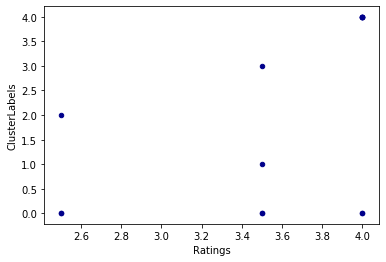

In [413]:
ax1 = torchy_merged.plot.scatter(x='Ratings',
                      y='ClusterLabels',
                      c='DarkBlue')

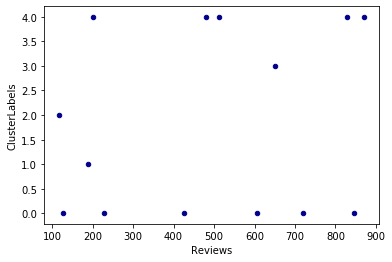

In [414]:
ax3 = torchy_merged.plot.scatter(x='Reviews',
                      y='ClusterLabels',
                      c='DarkBlue')

#### 
It should be noted that ratings of the restaurant are much strong function of the service provide in that specific location. Thus, it may not be a good indicator while choosing a new location as service quality can be improved in the new location. Thus, the number of reviews was chosen as the success criteria under the assumption that a more popular location will gain more social engagement and hence, higher review. Let’ plot the number of reviews and the determined clusters. It is difficult to analyze the data based on this plot alone.

In [334]:
Cluster_Rating = pd.DataFrame(columns = ['ClusterLabels', 'Cluster Rating']) 
Cluster_Rating['ClusterLabels']=torchy_merged.ClusterLabels.unique()
Cluster_Rating=Cluster_Rating.sort_values('ClusterLabels')
Cluster_Rating

,ClusterLabels,Cluster Rating
0,0,NaN
2,1,NaN
4,2,NaN
3,3,NaN
1,4,NaN


#### Cluster 1

In [323]:
Cluster1=torchy_merged.loc[torchy_merged['ClusterLabels'] == 0, torchy_merged.columns[[1] + list(range(5, torchy_merged.shape[1]))]]
Cluster1

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Ratings,Reviews
0,"5900 W Slaughter Ln, Austin, TX 78749",American Restaurant,Pizza Place,Liquor Store,Salon / Barbershop,New American Restaurant,Coffee Shop,Bank,Food Truck,Grocery Store,Intersection,2.5,127
1,"18817 LIMESTONE COMMERCIAL DRIVE, Pflugerville...",Bakery,Pizza Place,Gift Shop,Ice Cream Shop,Furniture / Home Store,Chinese Restaurant,Clothing Store,Discount Store,Accessories Store,Movie Theater,2.5,227
5,"4211 Spicewood Springs Rd, Austin, TX 78759",Sandwich Place,Pizza Place,Convenience Store,Spa,Food Truck,Bike Shop,Liquor Store,Taco Place,Coffee Shop,Shipping Store,4.0,847
9,"4301 W William Cannon Dr, Austin, TX 78749",Pizza Place,Gym / Fitness Center,Bank,Sandwich Place,Burger Joint,Dessert Shop,Mexican Restaurant,Smoothie Shop,Salon / Barbershop,Coffee Shop,3.5,719
10,"11521 RR 620 N. E-1000, Austin, Texas, 78726",Fast Food Restaurant,Salon / Barbershop,Convenience Store,Pizza Place,Cosmetics Shop,Pet Store,Chinese Restaurant,Sandwich Place,Restaurant,Coffee Shop,4.0,606
13,"1801 E 51st St, Austin, TX 78723",Park,Coffee Shop,Juice Bar,Liquor Store,Market,Shipping Store,Mobile Phone Shop,Salon / Barbershop,Restaurant,Food Truck,3.5,425


In [339]:
CR=Cluster1['Reviews'].mean()
Cluster_Rating.at[0, 'Cluster Rating'] = CR 
Cluster_Rating

,ClusterLabels,Cluster Rating
0,0,491.833
2,1,NaN
4,2,NaN
3,3,NaN
1,4,NaN


#### Cluster 2

In [290]:
Cluster2= torchy_merged.loc[torchy_merged['ClusterLabels'] == 1, torchy_merged.columns[[1] + list(range(5, torchy_merged.shape[1]))]]
Cluster2

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Ratings,Reviews
3,"1945 Medical Dr, Lakeway, TX 78734",American Restaurant,Fried Chicken Joint,Burger Joint,Gym,Bowling Alley,Thrift / Vintage Store,Fast Food Restaurant,Frozen Yogurt Shop,Pizza Place,Coffee Shop,3.5,188


In [340]:
CR=Cluster2['Reviews'].mean()
Cluster_Rating.at[2, 'Cluster Rating'] = CR 
Cluster_Rating

,ClusterLabels,Cluster Rating
0,0,491.833
2,1,188
4,2,NaN
3,3,NaN
1,4,NaN


#### Cluster 3

In [344]:
Cluster3=torchy_merged.loc[torchy_merged['ClusterLabels'] == 2, torchy_merged.columns[[1] + list(range(5, torchy_merged.shape[1]))]]
Cluster3

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Ratings,Reviews
8,"166 Hargraves Dr, Austin, TX 78737",Donut Shop,BBQ Joint,Sandwich Place,Thai Restaurant,Fast Food Restaurant,Juice Bar,Restaurant,Taco Place,Liquor Store,Pizza Place,2.5,118


In [349]:
CR=Cluster3['Reviews'].mean()
Cluster_Rating.at[4, 'Cluster Rating'] = CR 
Cluster_Rating

,ClusterLabels,Cluster Rating
0,0,491.833
2,1,188
4,2,118
3,3,651
1,4,NaN


#### Cluster 4

In [350]:
Cluster4=torchy_merged.loc[torchy_merged['ClusterLabels'] == 3, torchy_merged.columns[[1] + list(range(5, torchy_merged.shape[1]))]]
Cluster4

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Ratings,Reviews
4,"1468 E Whitestone Blvd, Cedar Park, TX 78613",Fried Chicken Joint,Mexican Restaurant,Burger Joint,Sandwich Place,Fabric Shop,Café,South Indian Restaurant,Steakhouse,Gas Station,Bookstore,3.5,651


In [351]:
CR=Cluster4['Reviews'].mean()
Cluster_Rating.at[3, 'Cluster Rating'] = CR 
Cluster_Rating

,ClusterLabels,Cluster Rating
0,0,491.833
2,1,188
4,2,118
3,3,651
1,4,NaN


#### Cluster 5

In [352]:
Cluster5=torchy_merged.loc[torchy_merged['ClusterLabels'] == 4, torchy_merged.columns[[1] + list(range(5, torchy_merged.shape[1]))]]
Cluster5

,Address,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,Ratings,Reviews
2,"110 San Antonio Street, Austin, Texas, 78701",Coffee Shop,Italian Restaurant,Gym,Grocery Store,Cocktail Bar,Concert Hall,Steakhouse,Mexican Restaurant,New American Restaurant,Salad Place,4.0,201
6,"2801 Guadalupe St, Austin, TX 78705",Food Truck,Burger Joint,Taco Place,Bar,Thrift / Vintage Store,Shipping Store,Pizza Place,Thai Restaurant,Smoke Shop,Mexican Restaurant,4.0,870
7,"5119 Burnet Rd, Austin, TX 78756",Food Truck,Thrift / Vintage Store,Bakery,Coffee Shop,Taco Place,Mexican Restaurant,Gas Station,Yoga Studio,Pizza Place,Sandwich Place,4.0,512
11,"1822 S Congress Ave, Austin, TX 78704",Art Gallery,Spa,Boutique,New American Restaurant,Italian Restaurant,Pizza Place,Food Truck,Sandwich Place,Burger Joint,Soup Place,4.0,829
12,"3005 S Lamar Blvd, Austin, TX 78704",Convenience Store,Sandwich Place,Art Gallery,Taco Place,Pizza Place,Burger Joint,Thrift / Vintage Store,Cosmetics Shop,Park,Shipping Store,4.0,481


In [354]:
CR=Cluster5['Reviews'].mean()
Cluster_Rating.at[1, 'Cluster Rating'] = CR 
Cluster_Rating

,ClusterLabels,Cluster Rating
0,0,491.833
2,1,188
4,2,118
3,3,651
1,4,578.6


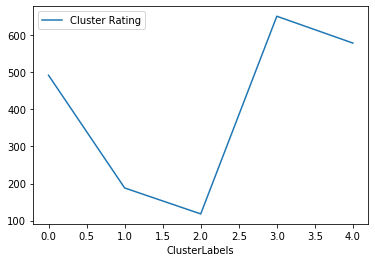

In [356]:
ax2= Cluster_Rating.plot.line('ClusterLabels','Cluster Rating')

#### 
Therefore, for each cluster location, an average cluster rating was determined based on the number of reviews and following plot was obtained. It can be seen that cluster (label) 3 has the highest normalized reviews followed by cluster 4.

Let’s look at the cluster again to focus on these clusters. Cluster 3 gave the higher cluster rating so a nearby location in that region is a good candidate for the new franchise. However, the data to support this is limited as only one restaurant fall into this cateogory. In contrast, Cluster 4 has 5 existing restaurants which are doing well based on the social ratings. A new franchise in this cluster region can also be a good candidate. The existing locations can also look at these findings to investigate why certain locations has higher rating than other and perhaps improve the underlying issues such as poor service, management etc.

## Conclusion
In this work, the various existing locations of a famous food chain- Torchy’s Tacos in Austin area was investigated to determine the optimal location of a new franchise. Four Square API was used to get the information regarding the nearby popular venues and top ten common venues was obtained for each location. Since, the success of a business is strongly dependent on the nearby businesses, these nearby venues were used to determine different clusters in which existing location fits. The number of reviews on the Yelp was used to determine the successful location as more popular spots lead to higher social engagement. The best clusters were determined using higher average cluster ratings which can serve as a guide while opening a new franchise.